In [1]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import json
#import numpy.polynomial.polynomial as poly

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
import matplotlib.patches as mpatches

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
from datetime import datetime

import matplotlib.dates as mdates

import seaborn as sns # Optional, will only affect the color of bars and the grid

from ipywidgets import widgets, interactive, Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

from io import StringIO

#from secret import *

### START GRAPHING

In [2]:
if os.path.isfile("Master_File_File.csv"):
    filepath_master = "Master_File_File.csv"
    print ("Master_File_.csv loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



Master_File_.csv loading from file


In [3]:
df= pd.read_csv(filepath_master)
print ("done")

done


### CREATE A BASE/UNMANIPULATED DF FOR LATER

In [4]:
df_base = df

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = (20)

### USEFUL LINKS

https://matplotlib.org/users/legend_guide.html

http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_markersize

https://matplotlib.org/users/colors.html

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

https://github.com/tomwyb/code1161base/blob/master/.ipynb_checkpoints/aircon-checkpoint.ipynb

### SORT  INPUT % BY TEAM IN MATCH

### SORT  INPUT % BY MATCH

### TOTALS FUNCTION (RAIN OPTION)

In [6]:
def plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, y_axis, size, text_size, label):

    

    rain_color = 'navy'
    rain_label = 'RAIN'
    norain_color = 'lightblue'
    norain_label = 'NO RAIN'
    alpha_level = 0.8
    
    plt.plot_date(x1, y1, markersize= size, markerfacecolor = rain_color, label=rain_label, alpha = alpha_level)
    plt.plot_date(x2, y2, markersize= size, markerfacecolor = norain_color, label = norain_label, alpha = alpha_level)

          
     
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    plt.plot(np.sort(x1), ffit,rain_color)

    coefs = np.polyfit(x2, y2, 4)
    ffit = np.polyval(coefs, np.sort(x2))
    plt.plot(np.sort(x2), ffit,norain_color)
    
    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()
    

In [7]:
def plot_puretotals_graph (x1, y1, year, x_axis, y_axis, size, text_size, label):


    totals_color = 'navy'
    totals_label = 'TOTALS'
    label = y_axis + ' v ' + x_axis + ' ' + 'FOR ALL GAMES (2001-2017)'
    alpha_level = 0.8

    
    plt.plot_date(x1, y1, markersize= size, markerfacecolor = totals_color, label=totals_label, alpha = alpha_level)
    

          
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    plt.plot(np.sort(x1), ffit,rain_color)


    
    plt.title(label)
    plt.xlabel(x_axis, fontsize = text_size)
    plt.ylabel(y_axis, fontsize = text_size)


    plt.legend(loc='upper left', prop={"size" : text_size});
    plt.show()  
    

In [8]:
def make_totalsfunction(year, teamname, input_data, rain_data):  
#make_totals(year,y_axis, rain_data):  
    
    x_axis = 'PLOT_TIME'
    new_input_data = input_data + '_TOTAL'
    match_totals = df[[input_data]].groupby(df.MATCH_ID).sum()
    #print (match_totals)
    
    def _total(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[input_data]
        return int (total_row_output)


    df[new_input_data] = df.apply(_total, axis=1)
    
    input_data = new_input_data
    
    temp_df = df

    
    
    if (teamname == 'All') & (year == 'All') :
        temp_df = temp_df[temp_df.HOME == True]
        label = 'this'
    
    elif (teamname == 'All') & (year != 'All') :
        temp_df = temp_df[temp_df.YEAR == int(year)]  
        label = 'this'

    elif(teamname != 'All') & (year == 'All') :
        temp_df = temp_df[temp_df.TEAMNAME == teamname] 
        label = input_data + ' FOR GAMES INVOLING ' + teamname.upper() + ' ' + ' (2001-2017)'
        
    else:
        temp_df = temp_df[(temp_df.TEAMNAME == teamname) & (temp_df.YEAR == int(year))]
        label = 'this'
    
    
    
    size = 6
    text_size = 12
    alpha_level = 0.8
    
    
    if rain_data == 'No_Rain':
        x1 = temp_df[x_axis]
        y1 = temp_df[input_data]
        
        return plot_puretotals_graph (x1, y1, year, x_axis, input_data, size, text_size, label)
        
    elif rain_data == 'Rain':
        df_raindata = temp_df[temp_df.RAIN != "No Data"]
        df_raindata.RAIN = df_raindata.RAIN.astype(float)
        no_rain = df_raindata[df_raindata.RAIN == 0.0]
        rain = df_raindata[df_raindata.RAIN > 0.0]
        
        x1 = rain[x_axis]
        x2 = no_rain[x_axis]
        y1 = rain[input_data]
        y2 = no_rain[input_data]
        
        x_axis = 'YEARS'
        
        return plot_raintotals_graph (x1, x2, y1, y2, year, x_axis, input_data, size, text_size, label)
        
        
    else:
        print ('error in rain input')
        
        

In [9]:
def perc_data_bymatch(datatype):
    basetype = datatype.split('_')[0]
    #datatype = basetype + '_MATCHSHARE'

    match_totals = df[[basetype]].groupby(df.MATCH_ID).sum()

    def _percentage(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[basetype]
        percentage = (x[basetype]/ total_row_output)*100
        return float(("%.2f" % round(percentage,2)))

    df[datatype] = df.apply(_percentage, axis=1)
    return df[datatype]

In [10]:
def perc_data_byteam(basetype, comparison):
    datatype = basetype + '_PERC_OF_' + comparison

    def perc_(x):
        percentage = (x[basetype]/x[comparison])*100
        return float(("%.2f" % round(percentage,2)))


    df[datatype] = df.apply(perc_, axis=1)
    return df[datatype]



In [11]:
def axis(temp_df,comparison_data, input_data):

    df_win = temp_df[temp_df.RESULT == "Win"]
    df_lose = temp_df[temp_df.RESULT == "Lose"]
    
    x1 = df_win[comparison_data]
    x2 = df_lose[comparison_data]
    y1 = df_win[input_data]
    y2= df_lose[input_data]
    return x1, x2, y1, y2

In [12]:
def best_fit (x1, y1,colour, totals_type):  
    coefs = np.polyfit(x1, y1, 4)
    ffit = np.polyval(coefs, np.sort(x1))
    alpha = 0.8
    if totals_type == 'non_totals':
        return plt.plot(np.sort(x1), ffit,colour, linewidth= 3, alpha = alpha)
    else: 
        return plt.plot(np.sort(x1), ffit,colour, linestyle='--', alpha = alpha)

In [13]:
def plot_date (x, y, sizes, colors, labels, alphas):
    #fig = plt.figure()
    #ax = plt.subplot(111)
    return plt.plot_date(x, y, markersize= sizes, markerfacecolor = colors, label= labels, alpha = alphas)

In [14]:
def plot_scatter (x, y, sizes, colors, labels, alphas):
    #fig = plt.figure()
    #ax = plt.subplot(111)
    return plt.scatter(x, y, s= sizes, color = colors, label= labels, alpha = alphas)

### WINLOSS FUNCTION

### BREAK

### UPDATE SO THAT TOTALS WORKS, THEN  MAKE RAIN FUNCTION WORK, LINE OF BEST FIT LEGEND, TIGHTEN TITLES AND DO D3 MATPLOTlib

In [15]:
def make_graphfunction(year, teamname, comparison_data, input_data):  
 


    ## pass in our comparison data and input_data- if it includes an underscore like percentages ones do
    ## it will create a new column based on these %, if no % it will just make one over the old one
    if '_' in comparison_data:
        perc_data_bymatch(comparison_data)
    if '_' in input_data:
        perc_data_bymatch(input_data)

    
    if comparison_data == 'TIME':
        comparison_data = 'PLOT_TIME'
        
    clean_df = df
    

    
    
    ### no line of best fit 
    if (teamname == 'All') & (year == 'All') :
        data_list = axis(clean_df,comparison_data, input_data)
        totals_list = 'No_Totals_List'
        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS (2001-2017)" 
        time_size = 4.5
        data_size = 14.5

        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

    ### no line of best fit    
    elif (teamname == 'All') & (year != 'All') :
        data_list = axis(clean_df[clean_df.YEAR == int(year)] , comparison_data, input_data)
        totals_list = 'No_Totals_List'
        time_size = 7
        data_size = 50

        label = input_data + ' v ' + comparison_data + ' ' + "FOR ALL WINNING AND LOSING TEAMS"  + ' ' +  year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
    
    
    ### need a line of best fit
    elif(teamname != 'All') & (year == 'All') :
        data_list = axis(clean_df[clean_df.TEAMNAME == teamname] ,comparison_data, input_data)
        totals_list = axis(clean_df,comparison_data, input_data)
        time_size = 7
        data_size = 50
         
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname.upper() + ' ' +  '(2001-2017)'
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)

        
    ### need a line of best fit
    else:
        data_list = axis(clean_df[(clean_df.TEAMNAME == teamname) & (clean_df.YEAR == int(year))] , comparison_data, input_data)
        totals_list = axis(clean_df[clean_df.YEAR == int(year)],comparison_data, input_data)
        time_size = 10
        data_size = 75
        print ('4th')
        label = input_data + ' v ' + comparison_data + ' ' + "FOR " + teamname + ' WINNING AND LOSING ' + year
        return plot_graph(data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size)
        
        
        

## BREAK

In [24]:
def plot_graph (data_list, year, teamname, label, comparison_data, input_data, totals_list, time_size, data_size):
    
    ### passing in two x and y's, if match totals, we need to use a different color and only 1 x and y
    x1 = data_list[0]
    x2 = data_list[1]
    y1 = data_list[2]
    y2= data_list[3]
        
    color_01 = 'navy'
    label_01 = 'WIN'
    color_02 = 'orange'
    label_02 = 'LOSE'
    text_size = 14
    alpha = 0.6
    bbox_to_anchor=(1.05, 1)
    loc=2
    borderaxespad=0.0
    


    
    if comparison_data == 'PLOT_TIME':
        plot_date (x1, y1, time_size, color_01, label_01, alpha)
        plot_date (x2, y2, time_size, color_02, label_02, alpha)

        
    elif input_data == 'PLOT_TIME':
        print ('Time must be on x-axis')
          
    else:
        plot_scatter (x1, y1, data_size, color_01, label_01, alpha)
        plot_scatter (x2, y2, data_size, color_02, label_02, alpha)
        

    entry01 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor=color_01, label = label_01)
    entry02 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor=color_02, label = label_02)
                
                    

    plt.grid()
    try:
        best_fit (x1, y1, color_01, 'non_totals')
        bf_legend01 = mlines.Line2D([], [], color= color_01, label='Sample Data Winning Trend')
        best_fit (x2, y2, color_02, 'non_totals')
        bf_legend02 = mlines.Line2D([], [], color= color_02, label='Sample Data Losing Trend')
        test = 'pass'
        
    except Exception as e:
        test = 'fail'
       
        
    if (teamname != 'All') & (totals_list != 'No_Totals_List') :
       
        line_x1 = totals_list[0]
        line_x2 = totals_list[1]
        line_y1 = totals_list[2]
        line_y2 = totals_list[3]
        #color_03 = 'navy'
        #color_04 = 'red'
        
        best_fit (line_x1, line_y1, color_01, 'totals')
        bf_legend03 = mlines.Line2D([], [],color= color_01, label='All Data Winning Trend', linestyle='--')
        
        #red_patch = mpatches.Patch(color='red', label='The red data')
        # http://matplotlib.org/users/legend_guide.html
        
        best_fit (line_x2, line_y2, color_02, 'totals')
        bf_legend04 = mlines.Line2D([], [], color= color_02, label= 'All Data Losing Trend', linestyle='--')
        plt.legend(bbox_to_anchor=bbox_to_anchor, loc=loc, borderaxespad=borderaxespad, handles=[entry01, entry02, bf_legend01,bf_legend02, bf_legend03, bf_legend04])
        #plt.legend(loc='upper left', prop={"size" : text_size}, handles=[entry01, entry02, bf_legend01,bf_legend02, bf_legend03, bf_legend04])
        
    else: 
        if test == 'pass':
            plt.legend(bbox_to_anchor=bbox_to_anchor, loc=loc, borderaxespad=borderaxespad, handles=[entry01, entry02, bf_legend01,bf_legend02])
        else: 
            plt.legend(bbox_to_anchor=bbox_to_anchor, loc=loc, borderaxespad=borderaxespad, handles=[entry01, entry02])
    


    plt.title(label)
    if comparison_data == 'PLOT_TIME':
        comparison_data = 'TIME'
    plt.xlabel(comparison_data, fontsize = text_size)
    plt.ylabel(input_data, fontsize = text_size)
    #plt.xticks(np.arange(min(x1), max(x1)+10, 1.0))
    #https://matplotlib.org/examples/ticks_and_spines/ticklabels_demo_rotation.html

    
    
    
    #plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
    #plt.legend(loc='upper left', prop={"size" : text_size});
    
    plt.show()
    

### SET GRAPHS TO PRINT

In [17]:
def percentage_graphs (comparison_data): 
    
    if comparison_data != input_data:


        perc_data_bymatch(comparison_data)
        perc_data_byteam(comparison_data, input_data)


        make_graphfunction(year, teamname, comparison_data, input_data)
        make_graphfunction(year, teamname, 'PLOT_TIME', comparison_data)


        ### ONLY RUN GRAPHS IF THEY ARE % OF TOTALPOSSESSIONS
        if (input_data == 'TOTALPOSSESSIONS' and (comparison_data == 'CONTESTEDPOSSESSIONS' or comparison_data == 'UNCONTESTEDPOSSESSIONS'
            or comparison_data == 'KICKS' or comparison_data == 'HANDBALLS')) or (input_data == 'MARKS' and (comparison_data == 'CONTESTEDMARKS'
            or comparison_data == 'MARKSINSIDE50')) or (input_data == 'TACKLES' and (comparison_data == 'TACKLESINSIDE50')):


            make_graphfunction(year, teamname, 'PLOT_TIME', comparison_data + '_PERC_OF_'  + input_data)
            make_graphfunction(year, teamname, comparison_data + '_PERC_OF_'  + input_data, input_data )

        else: pass


        make_graphfunction(year, teamname, comparison_data + '_PERC_RELATIVE_TO_OPPONENT', input_data)
        
    else: pass
    


###  INPUT DATA (INPUT DATA, TEAM, YEAR, RAIN)

In [18]:
Rain_List = ['Rain', 'No_Rain']

Team_List = ['All', 'GWS Giants', 'Port Adelaide', 'Richmond', 'Hawthorn', 'Melbourne',
           'Collingwood', 'St Kilda', 'Gold Coast Suns', 'Carlton',
           'Geelong Cats', 'Western Bulldogs', 'West Coast Eagles',
           'Adelaide Crows', 'North Melbourne', 'Essendon', 'Fremantle',
           'Sydney Swans', 'Brisbane Lions']

Year_List = ['All', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
             '2011', '2012', '2013', '2014', '2015', '2016', '2017']
Data_List = ['TOTALPOSSESSIONS', 'CONTESTEDPOSSESSIONS', 'UNCONTESTEDPOSSESSIONS','DISPOSALS', 'DISPOSALEFFICIENCY', 
            'KICKS','HANDBALLS','MARKS', 'CONTESTEDMARKS', 'MARKSINSIDE50', 'TACKLES', 'TACKLESINSIDE50', 
             'CENTRECLEARANCES', 'INSIDE50S','ONEPERCENTERS', 'REBOUND50S','STOPPAGECLEARANCES', 'TOTALCLEARANCES', 
             'CROWD']

share = '_MATCHSHARE'
Data_List_Share = ['TOTALPOSSESSIONS' + share, 'CONTESTEDPOSSESSIONS'+ share, 'UNCONTESTEDPOSSESSIONS'+ share,'DISPOSALS'+ share, 
            'KICKS'+ share,'HANDBALLS'+ share,'MARKS'+ share, 'CONTESTEDMARKS'+ share, 'MARKSINSIDE50'+ share, 'TACKLES'+ share, 'TACKLESINSIDE50'+ share, 
             'CENTRECLEARANCES'+ share, 'INSIDE50S'+ share,'ONEPERCENTERS'+ share, 'REBOUND50S'+ share,'STOPPAGECLEARANCES'+ share, 'TOTALCLEARANCES'+ share 
            ]

In [19]:
Data_List_Share[0]

'TOTALPOSSESSIONS_MATCHSHARE'

In [20]:
def test (input_data, comparison_data): 
    
    year = Year_List[0]
    teamname = Team_List [0]




    make_graphfunction(year, teamname, comparison_data, input_data)
    

        

    


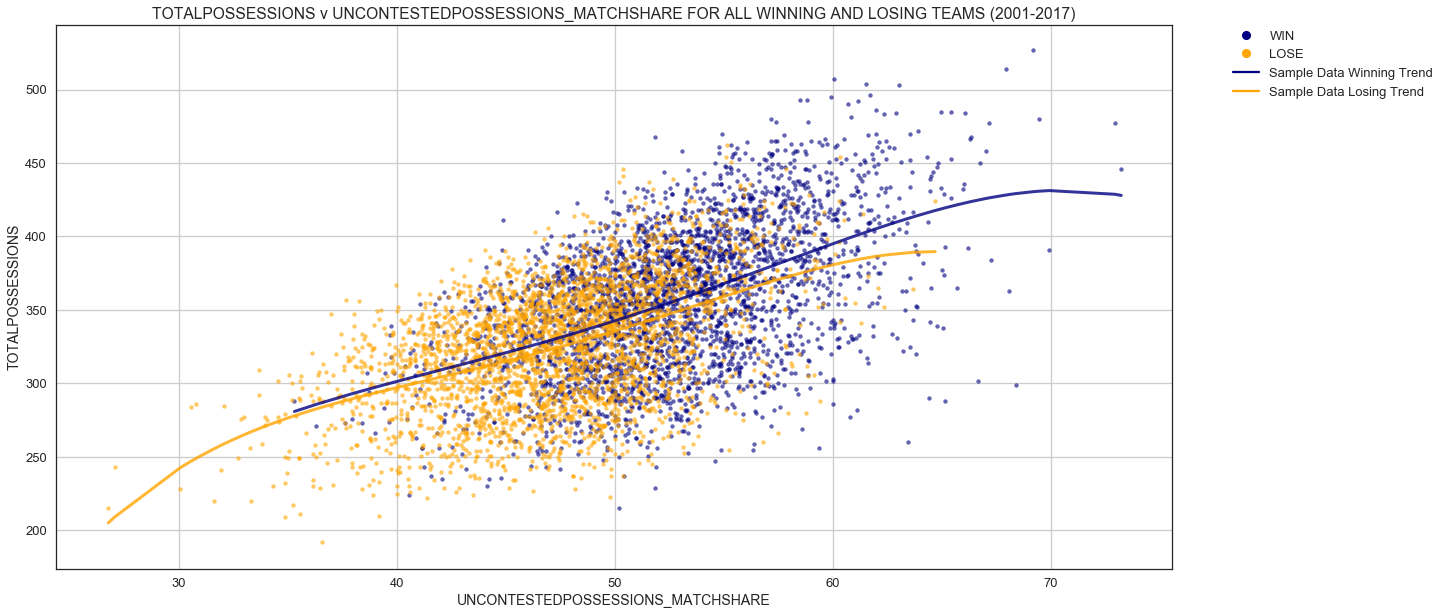

In [21]:
test ('TOTALPOSSESSIONS', Data_List_Share[2])

In [22]:
form_item_layout = Layout(
    display='flex',
    flex_flow='column',
    border='solid 1px',
    align_items='stretch',
    width='100%',
    justify_content='space-between'
)


year = widgets.Dropdown(
    options= Year_List,
    value= 'All',
    description='By Year',
)

teamname = widgets.Dropdown(
    options= Team_List,
    value= 'All',
    description='By Team',
)


input_data = widgets.Dropdown(
    options= Data_List + Data_List_Share,
    value='TOTALPOSSESSIONS',
    description='Data Y-Axis:',
)



comparison_data = widgets.Dropdown(
    options=['TIME'] + Data_List + Data_List_Share,
    value= 'TIME',
    description='Data X-Axis:',
)



## When adding in text box for users to type into

http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html

https://www.google.com.au/search?q=posting+interactive+python+widget+on+website&rlz=1C5CHFA_enAU746AU746&oq=posting+interactive+python+widget+on+website&aqs=chrome..69i57.9537j0j7&sourceid=chrome&ie=UTF-8

http://earthpy.org/pyncview_pm.html

start_year = widgets.BoundedFloatText(
    value=df.Year.min(),
    min=df.Year.min(),
    max=df.Year.max(),
    step=1,
    description='Start Year:',
    disabled=False,
    color='black'

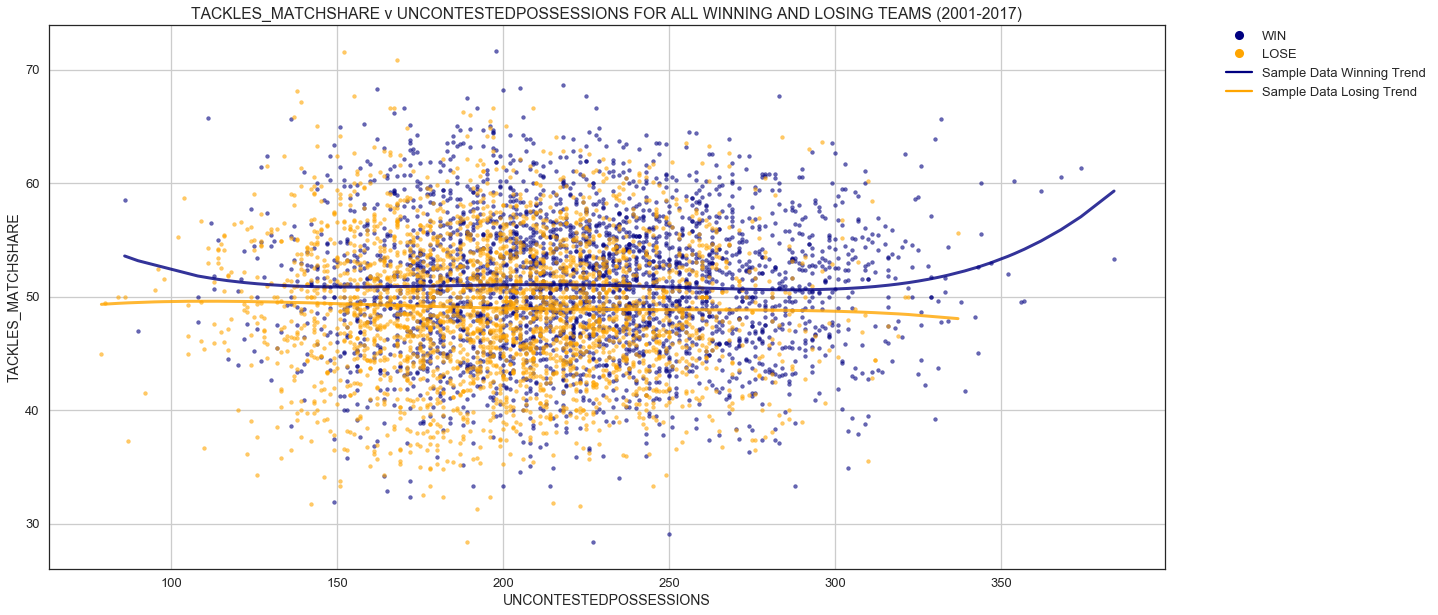

In [25]:
interactive(make_graphfunction, input_data=input_data, comparison_data = comparison_data, teamname = teamname, year = year)

## break

In [ ]:
#teamname = Team_List[0]
#year = Year_List[0]
#input_data = Data_List[0]
#rain_data = Rain_List[0]


## could sort by venue

## when its year add in more ticks

### add in the overall league trend line as different colour- add additional labels- this is just simply running the
## same script when we do all but within a team one- as in when we change say a team one we still want to keep one running
## which just shows all then we can filter that- if its team we just look at team if its team and year we keep all for
## team but filter down by year, if its year, we just filter dowm by year but keep team- easy- its just in the first one
## we do- this can then be applied to all match totals if needed too- but this is the big one to get working!!!! go do it

### sort the totals by team playing- not just home team, sort all by home team, if team give, sort by teamname

## set line of best fit as a function

### CREATE A SERIES OF GRAPHS BASED ON ONE INPUT TYPE

#base_graphs (year, teamname,input_data, rain_data)


## CREATE INPUT GRAPHS
make_totalsfunction(year, teamname, input_data, rain_data)
for i in Data_List:
    
    percentage_graphs(i)
    

## this takes input data and creates comparison graphs for all data_list types    
    
    
#for input_data in Data_List_2:
    #for comparison_data in Data_List_2
    #print (i)
    #percentage_graphs(input_data, comparison_data )
    
#percentage_graphs ('CONTESTEDPOSSESSIONS')

#print ('yes2')

### END